# Data Science Lab: Lab 6

Submit:

A pdf of your notebook with solutions.
A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

**Fully Connected Models and XOR**


1. How to create data objects that pytorch can use
2. How to create a dataloader
3. How to define a basic fully connected single layer model
4. How to define a multi-layer fully connected model
5. How to add non-linear activation functions.
6. How to add layers in two different ways

We also see the importance of nonlinear activation functions directly, by experimenting with the simple 4-data-point XOR example that we saw in class.

We also see that neural networks are fundamentally different than, say, logistic regression or linear regression, in that they can get stuck in local minima. A simple way to say this is that a different random seed may lead to a different solution.

We explore how capacity (the size of the neural network) could affect this situation.

**Note:** Make sure that you fix a random seed so that you can replicate your solutions. This is always a good practice, and in particular important here, as we see below.

In [37]:
import torch
import numpy as np
import time
from tqdm.notebook import tqdm

# First we define a linear regressor.
This is the same as a fully connected layer. It will be a building block in making deeper neural networks with fully connected layers.

In [38]:
# We define our first class: LinearRegressor
#
class LinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define the layer(s) needed for the linear model.
        """
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim, bias = True) # just linear

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)


    # defining a separate predict function is useful for multi-class
    # classification as we will see later. Here it is
    # unnecessary.

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)




## Problem 1:

Now you will use torch.nn.Sequential (see https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) to construct a two layer neural network, with two fully connected layers (no non-linearity yet). Thus, you will combine torch.nn.Sequential with torch.nn.Linear that you saw above.


Design your network so that the first layer has as many neurons as the input.

Note: you have only one line to fill in here.

In [39]:
class TwoLayerLinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define a model that stacks two linear fully connected layers.
        """
        super().__init__()
        self.TLL = torch.nn.Sequential(
            LinearRegressor(input_dim, input_dim),
            LinearRegressor(input_dim, output_dim)
        )# TO DO: complete this equality, using torch.nn.Sequential
 
    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.TLL(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.TLL(x)
        return torch.flatten(x)






## Problem 2

Now you will create the same network, but using different syntax: you will not use torch.nn.Sequential. You need to fill in the two lines as noted by the comments.

In [40]:
class TwoLayerLinearRegressor2(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define a model that stacks two linear fully connected layers.
        """
        super().__init__()
        self.fc1 = LinearRegressor(input_dim, input_dim)  # First fully connected layer
        self.fc2 = LinearRegressor(input_dim, output_dim)  # Second fully connected layer


    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """

        x = self.fc1(x)
        x = self.fc2(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.fc1(x)
        x = self.fc2(x)
        return torch.flatten(x)


## Problem 3

Now you will define a 2 layer neural network with ReLU activation at the first layer. In other words:

Let $x$ be the input.
Then writing $z = Wx + c$, $h=$ReLU$(z)$ is the first layer's neurons. Then the output is $y = w\cdot z+d$.

Create this neural network using the torch.nn.Sequential command. Conceptually, it may help to realize that this neural network is: a fully connected layer followed by a ReLU, followed by a fully connected layer.

Also see: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

Note: You have only one line to fill in here.

In [41]:
class TwoLayerNonLinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define a model that has a linear layer, a ReLU layer and another linear layer.
        """
        super().__init__()
        self.linear = torch.nn.Sequential(
            LinearRegressor(input_dim, input_dim),
            torch.nn.ReLU(),
            LinearRegressor(input_dim, output_dim)
        )
    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)



## Problem 4

Do this one more time, but now without torch.nn.Sequential.

You have three lines to fill in here.

In [42]:
# We now do this again, without using nn.sequential
# in order to illustrate different syntax.

class TwoLayerNonLinearRegressor2(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define a model that has a linear layer, a ReLU layer and another linear layer.
        """
        super().__init__()
        self.fc1 = LinearRegressor(input_dim, input_dim)  # First linear layer
        self.relu = torch.nn.ReLU()                       # ReLU activation
        self.fc2 = LinearRegressor(input_dim, output_dim) # Second linear layer

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.flatten(x)

## Problem 5 (Nothing to turn in)

Read the documentation https://pytorch.org/docs/stable/optim.html to see what are the options pytorch provides for an optimizer, and what the parameters are.

## Problem 6

Explain what the code


```
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```
and


```
model.to(device)
x = x.to(device)
y = y.to(device)
```

does. This does not have to be a completely rigorous definition -- just explain enough to make clear that you understand what the code is doing and why it's important.



The code 
```
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```
checks if the compute/computer you are running the model and pytorch on has cuda and determines what device to run on based on the result. Cuda is a parallel computing platform on NVIDIA GPUs that allow for parallel processing that is used to speed up and optimize AI model and machine learning performance. The code basically determines tries to optimize the performance of the model and code by running the code on the GPU and CUDA if the computer has CUDA. Otherwise, it runs the code on the cpu. CUDA and its implementation with PyTorch are the reason why NVIDIA is the most valuable company in the world with the rise of AI and need for compute. 

## Problem 7

Modify the code below for the training loop, so that in addition to training, you output a curve of the training error over each epoch.

In [43]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

def train(model, data_train, data_val, device, lr=0.01, epochs=5000):
    """
    Train the model.

    Input:
      model (torch.nn.Module): the model to train
      data_train (torch.utils.data.Dataloader): yields batches of data
      data_val (torch.utils.data.Dataloader): use this to validate your model
      device (torch.device): which device to use to perform computation

      (optional) lr: learning rate hyperparameter
      (optional) epochs: number of passes over dataloader
    """

    # Setup the loss function to use: mean squared error
    loss_function = torch.nn.MSELoss(reduction='sum')

    # Setup the optimizer -- just generic ADAM
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # List to store training losses for plotting
    training_losses = []

    # Wrap in a progress bar.
    for epoch in tqdm(range(epochs)):
        # Set the model to training mode.
        model.train()
        
        epoch_loss = 0.0  # Accumulate loss over the epoch

        for x, y in data_train:
            x = x.to(device)
            y = y.to(device)

            # Forward pass through the network
            output = model(x)

            # Compute loss
            loss = loss_function(output, y)

            # Update model weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate batch loss
            epoch_loss += loss.item()

        # Calculate average epoch loss and store it
        average_epoch_loss = epoch_loss / len(data_train)
        training_losses.append(average_epoch_loss)

        # Print the average loss every 100 epochs (optional but good practice for actual model training)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Training Loss: {average_epoch_loss:.4f}")

        # Set the model to eval mode and perform validation
        model.eval()
        with torch.no_grad():  # No gradient calculation during evaluation
            accuracies_val = []

            for x, y in data_val:
                x = x.to(device)
                y = y.to(device)

                y_pred = model.predict(x)

    # Plot the training error curve once training is complete
    plt.plot(training_losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.show()


In [44]:
# We write a function that takes a model, evaluate on the validation
# data set and returns the predictions

def evaluate_model(model,data_val,device):
  model.eval()
  output_vals = list()
  accuracys_val = list()
  for x, y in data_val:
            x = x.to(device)
            y = y.to(device)

            y_pred = model.predict(x)
            output_vals.append(y_pred)
            # accuracy_val = (y_pred == y).float().mean().item()
            # accuracys_val.append(accuracy_val)

  # accuracy = torch.FloatTensor(accuracys_val).mean().item()
  return output_vals

## Problem 8 (Nothing to turn in)

Read the documentation and try to understand what a dataloader is. You can start here https://pytorch.org/docs/stable/data.html but there are many tutorials out there as well.

In [45]:
# Creating the data: Linear Regression on Linear Data
from torch.utils.data import TensorDataset, DataLoader
N = 15
X = np.random.randn(N,3)
beta = np.array([1,-1,2])
Y = np.dot(X,beta)
tensor_x = torch.Tensor(X) # transform to torch tensor
tensor_y = torch.Tensor(Y)
print('These are the labels:\n',Y)
print('These are the features:\n',X)

m = 1 # Batch size
data = TensorDataset(tensor_x,tensor_y) # create your datset
data_train = DataLoader(data,batch_size = m, shuffle = True) # create your dataloader with training data
data_val = DataLoader(data) # create your dataloader with validation data, here same as training

These are the labels:
 [ 1.34216555  2.32833927 -0.58969203  0.0196335  -4.80061401 -1.06620466
 -2.04119599  2.4715739  -4.57424418 -0.73674977 -4.44991179 -8.50682614
  4.09954584 -5.05561889  1.3861254 ]
These are the features:
 [[ 0.76121674  0.30256121  0.44175501]
 [-0.12668172 -1.26542771  0.59479664]
 [ 0.13891975 -1.21010916 -0.96936047]
 [-0.79568263  0.1540495   0.48468281]
 [-0.97718993 -0.57004327 -2.19673368]
 [-1.87884762  0.53527232  0.67395765]
 [-1.45126278  1.07884329  0.24445504]
 [ 0.82816683 -1.35080556  0.14630076]
 [-2.1462973   1.19160778 -0.61816955]
 [ 0.8883927  -1.43087381 -1.52800814]
 [ 0.21084377  2.91723265 -0.87176146]
 [-1.28085049  0.96209953 -3.13193806]
 [ 0.46254315 -0.77826342  1.42936964]
 [-1.11062725 -0.59585109 -2.27042136]
 [ 1.170922    0.25417588  0.23468964]]


## Now we train and evaluate the linear model.

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 5/5000 [00:00<01:53, 43.84it/s]

Epoch 0/5000, Training Loss: 10.2099


  2%|▏         | 112/5000 [00:01<00:54, 90.09it/s]

Epoch 100/5000, Training Loss: 0.0000


  4%|▍         | 215/5000 [00:02<00:56, 84.19it/s]

Epoch 200/5000, Training Loss: 0.0000


  6%|▋         | 314/5000 [00:03<00:56, 82.71it/s]

Epoch 300/5000, Training Loss: 0.0000


  8%|▊         | 413/5000 [00:05<00:55, 82.41it/s]

Epoch 400/5000, Training Loss: 0.0000


 10%|█         | 512/5000 [00:06<00:55, 81.49it/s]

Epoch 500/5000, Training Loss: 0.0000


 12%|█▏        | 619/5000 [00:07<00:51, 84.42it/s]

Epoch 600/5000, Training Loss: 0.0000


 14%|█▍        | 719/5000 [00:08<00:49, 87.23it/s]

Epoch 700/5000, Training Loss: 0.0000


 16%|█▌        | 811/5000 [00:10<00:47, 88.06it/s]

Epoch 800/5000, Training Loss: 0.0000


 18%|█▊        | 912/5000 [00:11<00:49, 82.26it/s]

Epoch 900/5000, Training Loss: 0.0007


 20%|██        | 1013/5000 [00:12<00:48, 82.75it/s]

Epoch 1000/5000, Training Loss: 0.0000


 22%|██▏       | 1112/5000 [00:13<00:46, 83.60it/s]

Epoch 1100/5000, Training Loss: 0.0003


 24%|██▍       | 1210/5000 [00:14<00:44, 84.31it/s]

Epoch 1200/5000, Training Loss: 0.0000


 26%|██▌       | 1311/5000 [00:16<00:45, 81.55it/s]

Epoch 1300/5000, Training Loss: 0.0040


 28%|██▊       | 1412/5000 [00:17<00:43, 82.74it/s]

Epoch 1400/5000, Training Loss: 0.0001


 30%|███       | 1512/5000 [00:18<00:43, 79.28it/s]

Epoch 1500/5000, Training Loss: 0.0000


 32%|███▏      | 1611/5000 [00:19<00:41, 81.09it/s]

Epoch 1600/5000, Training Loss: 0.0000


 34%|███▍      | 1712/5000 [00:20<00:38, 86.11it/s]

Epoch 1700/5000, Training Loss: 0.0000


 36%|███▌      | 1803/5000 [00:22<00:39, 81.65it/s]

Epoch 1800/5000, Training Loss: 0.0000


 38%|███▊      | 1910/5000 [00:23<00:42, 72.43it/s]

Epoch 1900/5000, Training Loss: 0.0000


 40%|████      | 2011/5000 [00:25<00:37, 79.67it/s]

Epoch 2000/5000, Training Loss: 0.0000


 42%|████▏     | 2110/5000 [00:26<00:33, 85.00it/s]

Epoch 2100/5000, Training Loss: 0.0000


 44%|████▍     | 2215/5000 [00:27<00:33, 82.53it/s]

Epoch 2200/5000, Training Loss: 0.0000


 46%|████▌     | 2310/5000 [00:29<00:39, 67.98it/s]

Epoch 2300/5000, Training Loss: 0.0000


 48%|████▊     | 2404/5000 [00:31<01:31, 28.22it/s]

Epoch 2400/5000, Training Loss: 0.0000


 50%|█████     | 2509/5000 [00:33<00:36, 68.09it/s]

Epoch 2500/5000, Training Loss: 0.0000


 52%|█████▏    | 2613/5000 [00:34<00:34, 68.62it/s]

Epoch 2600/5000, Training Loss: 0.0001


 54%|█████▍    | 2708/5000 [00:36<00:41, 55.35it/s]

Epoch 2700/5000, Training Loss: 0.0000


 56%|█████▌    | 2812/5000 [00:38<00:33, 64.62it/s]

Epoch 2800/5000, Training Loss: 0.0001


 58%|█████▊    | 2910/5000 [00:39<00:34, 61.05it/s]

Epoch 2900/5000, Training Loss: 0.0000


 60%|██████    | 3011/5000 [00:41<00:29, 66.73it/s]

Epoch 3000/5000, Training Loss: 0.0000


 62%|██████▏   | 3118/5000 [00:42<00:22, 83.72it/s]

Epoch 3100/5000, Training Loss: 0.0000


 64%|██████▍   | 3215/5000 [00:44<00:25, 70.30it/s]

Epoch 3200/5000, Training Loss: 0.0000


 66%|██████▌   | 3311/5000 [00:45<00:21, 77.12it/s]

Epoch 3300/5000, Training Loss: 0.0000


 68%|██████▊   | 3410/5000 [00:46<00:19, 82.44it/s]

Epoch 3400/5000, Training Loss: 0.0000


 70%|███████   | 3512/5000 [00:47<00:17, 85.73it/s]

Epoch 3500/5000, Training Loss: 0.0000


 72%|███████▏  | 3612/5000 [00:49<00:17, 80.92it/s]

Epoch 3600/5000, Training Loss: 0.0000


 74%|███████▍  | 3711/5000 [00:50<00:16, 79.53it/s]

Epoch 3700/5000, Training Loss: 0.0005


 76%|███████▌  | 3810/5000 [00:51<00:14, 81.06it/s]

Epoch 3800/5000, Training Loss: 0.0000


 78%|███████▊  | 3918/5000 [00:52<00:13, 82.99it/s]

Epoch 3900/5000, Training Loss: 0.0001


 80%|████████  | 4018/5000 [00:53<00:11, 83.66it/s]

Epoch 4000/5000, Training Loss: 0.0000


 82%|████████▏ | 4109/5000 [00:55<00:10, 84.66it/s]

Epoch 4100/5000, Training Loss: 0.0000


 84%|████████▍ | 4209/5000 [00:56<00:09, 85.37it/s]

Epoch 4200/5000, Training Loss: 0.0000


 86%|████████▌ | 4309/5000 [00:57<00:08, 84.69it/s]

Epoch 4300/5000, Training Loss: 0.0000


 88%|████████▊ | 4411/5000 [00:58<00:07, 79.56it/s]

Epoch 4400/5000, Training Loss: 0.0000


 90%|█████████ | 4512/5000 [01:00<00:07, 61.14it/s]

Epoch 4500/5000, Training Loss: 0.0000


 92%|█████████▏| 4615/5000 [01:01<00:04, 81.44it/s]

Epoch 4600/5000, Training Loss: 0.0000


 94%|█████████▍| 4714/5000 [01:02<00:03, 84.36it/s]

Epoch 4700/5000, Training Loss: 0.0000


 96%|█████████▋| 4814/5000 [01:04<00:02, 84.57it/s]

Epoch 4800/5000, Training Loss: 0.0000


 98%|█████████▊| 4914/5000 [01:05<00:01, 85.23it/s]

Epoch 4900/5000, Training Loss: 0.0000


100%|██████████| 5000/5000 [01:06<00:00, 75.45it/s]


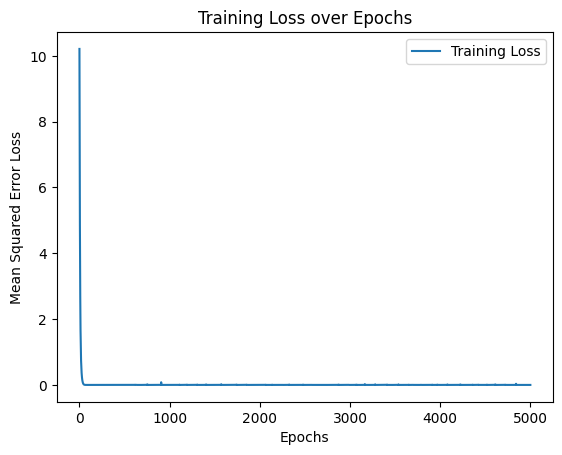

In [46]:
# Define the model we wish to use, and train it.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LinearRegressor(3, 1)
model.to(device)

train(model, data_train, data_val, device)

## Here is some code for getting the parameters of the model.

In [47]:
# Now let's get the model parameters.
# We can see that we have succeeded in learning beta: [1,-1,2]
for name, param in model.named_parameters():
  print (name, param.data)

# If we wanted to, we could also only print the ones that we update (may be useful for more complex models)
"""
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)
"""

linear.weight tensor([[ 0.9930, -1.0033,  1.9945]])
linear.bias tensor([6.1506e-05])


'\nfor name, param in model.named_parameters():\n    if param.requires_grad:\n        print (name, param.data)\n'

  0%|          | 2/5000 [00:00<04:46, 17.46it/s]

Epoch 0/5000, Training Loss: 10.2274


  2%|▏         | 112/5000 [00:02<01:19, 61.15it/s]

Epoch 100/5000, Training Loss: 0.0000


  4%|▍         | 209/5000 [00:04<01:38, 48.70it/s]

Epoch 200/5000, Training Loss: 0.0000


  6%|▌         | 309/5000 [00:06<01:34, 49.78it/s]

Epoch 300/5000, Training Loss: 0.0000


  8%|▊         | 409/5000 [00:07<01:15, 60.93it/s]

Epoch 400/5000, Training Loss: 0.0000


 10%|█         | 511/5000 [00:09<01:16, 58.50it/s]

Epoch 500/5000, Training Loss: 0.0000


 12%|█▏        | 607/5000 [00:11<01:15, 58.09it/s]

Epoch 600/5000, Training Loss: 0.0013


 14%|█▍        | 710/5000 [00:12<01:12, 59.14it/s]

Epoch 700/5000, Training Loss: 0.0000


 16%|█▌        | 806/5000 [00:14<01:07, 62.05it/s]

Epoch 800/5000, Training Loss: 0.0000


 18%|█▊        | 911/5000 [00:16<01:04, 62.92it/s]

Epoch 900/5000, Training Loss: 0.0000


 20%|██        | 1009/5000 [00:17<01:05, 60.64it/s]

Epoch 1000/5000, Training Loss: 0.0000


 22%|██▏       | 1112/5000 [00:19<01:04, 60.26it/s]

Epoch 1100/5000, Training Loss: 0.0012


 24%|██▍       | 1210/5000 [00:21<01:00, 62.80it/s]

Epoch 1200/5000, Training Loss: 0.0008


 26%|██▌       | 1307/5000 [00:22<00:59, 61.78it/s]

Epoch 1300/5000, Training Loss: 0.0371


 28%|██▊       | 1407/5000 [00:24<01:05, 54.74it/s]

Epoch 1400/5000, Training Loss: 0.0000


 30%|███       | 1509/5000 [00:26<00:59, 58.70it/s]

Epoch 1500/5000, Training Loss: 0.0000


 32%|███▏      | 1610/5000 [00:28<01:01, 55.50it/s]

Epoch 1600/5000, Training Loss: 0.0000


 34%|███▍      | 1712/5000 [00:29<00:55, 59.14it/s]

Epoch 1700/5000, Training Loss: 0.0003


 36%|███▌      | 1808/5000 [00:31<00:56, 56.96it/s]

Epoch 1800/5000, Training Loss: 0.0000


 38%|███▊      | 1911/5000 [00:33<00:51, 59.67it/s]

Epoch 1900/5000, Training Loss: 0.0000


 40%|████      | 2012/5000 [00:34<00:48, 61.56it/s]

Epoch 2000/5000, Training Loss: 0.0000


 42%|████▏     | 2110/5000 [00:36<00:47, 61.14it/s]

Epoch 2100/5000, Training Loss: 0.0000


 44%|████▍     | 2210/5000 [00:38<00:46, 59.99it/s]

Epoch 2200/5000, Training Loss: 0.0000


 46%|████▌     | 2308/5000 [00:39<00:45, 58.85it/s]

Epoch 2300/5000, Training Loss: 0.0000


 48%|████▊     | 2410/5000 [00:41<00:41, 61.88it/s]

Epoch 2400/5000, Training Loss: 0.0000


 50%|█████     | 2512/5000 [00:43<00:41, 60.15it/s]

Epoch 2500/5000, Training Loss: 0.0011


 52%|█████▏    | 2606/5000 [00:44<00:40, 59.29it/s]

Epoch 2600/5000, Training Loss: 0.0000


 54%|█████▍    | 2711/5000 [00:46<00:38, 60.06it/s]

Epoch 2700/5000, Training Loss: 0.0000


 56%|█████▌    | 2807/5000 [00:48<00:35, 61.55it/s]

Epoch 2800/5000, Training Loss: 0.0071


 58%|█████▊    | 2909/5000 [00:50<00:37, 56.34it/s]

Epoch 2900/5000, Training Loss: 0.0000


 60%|██████    | 3009/5000 [00:51<00:32, 61.10it/s]

Epoch 3000/5000, Training Loss: 0.0000


 62%|██████▏   | 3106/5000 [00:53<00:31, 60.26it/s]

Epoch 3100/5000, Training Loss: 0.0000


 64%|██████▍   | 3210/5000 [00:55<00:29, 60.51it/s]

Epoch 3200/5000, Training Loss: 0.0104


 66%|██████▋   | 3314/5000 [00:56<00:27, 61.09it/s]

Epoch 3300/5000, Training Loss: 0.0000


 68%|██████▊   | 3405/5000 [00:58<00:26, 60.82it/s]

Epoch 3400/5000, Training Loss: 0.0000


 70%|███████   | 3513/5000 [01:00<00:25, 59.19it/s]

Epoch 3500/5000, Training Loss: 0.0000


 72%|███████▏  | 3609/5000 [01:01<00:22, 60.78it/s]

Epoch 3600/5000, Training Loss: 0.0000


 74%|███████▍  | 3706/5000 [01:03<00:21, 59.52it/s]

Epoch 3700/5000, Training Loss: 0.0001


 76%|███████▌  | 3808/5000 [01:05<00:19, 61.15it/s]

Epoch 3800/5000, Training Loss: 0.0000


 78%|███████▊  | 3908/5000 [01:06<00:18, 60.59it/s]

Epoch 3900/5000, Training Loss: 0.0000


 80%|████████  | 4012/5000 [01:08<00:16, 59.48it/s]

Epoch 4000/5000, Training Loss: 0.0000


 82%|████████▏ | 4108/5000 [01:10<00:14, 60.19it/s]

Epoch 4100/5000, Training Loss: 0.0000


 84%|████████▍ | 4204/5000 [01:12<00:15, 52.87it/s]

Epoch 4200/5000, Training Loss: 0.0000


 86%|████████▌ | 4310/5000 [01:14<00:14, 48.28it/s]

Epoch 4300/5000, Training Loss: 0.0000


 88%|████████▊ | 4406/5000 [01:15<00:10, 56.71it/s]

Epoch 4400/5000, Training Loss: 0.0000


 90%|█████████ | 4511/5000 [01:17<00:08, 59.05it/s]

Epoch 4500/5000, Training Loss: 0.0000


 92%|█████████▏| 4608/5000 [01:19<00:06, 62.90it/s]

Epoch 4600/5000, Training Loss: 0.0042


 94%|█████████▍| 4706/5000 [01:20<00:04, 59.28it/s]

Epoch 4700/5000, Training Loss: 0.0000


 96%|█████████▌| 4810/5000 [01:22<00:03, 59.78it/s]

Epoch 4800/5000, Training Loss: 0.0000


 98%|█████████▊| 4909/5000 [01:24<00:01, 57.55it/s]

Epoch 4900/5000, Training Loss: 0.0001


100%|██████████| 5000/5000 [01:25<00:00, 58.15it/s]


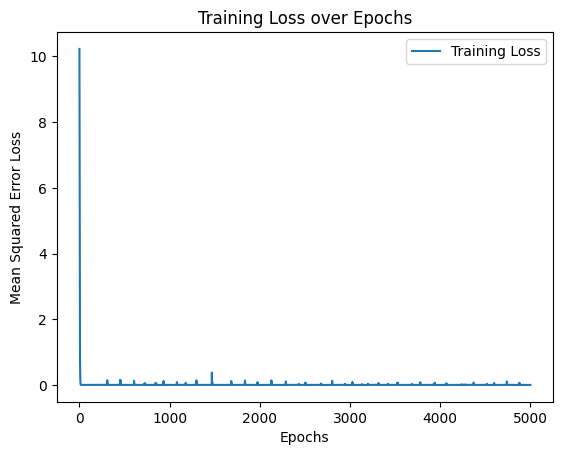

In [48]:
# Now let's move to our second model: the two layer linear regressor.
# We again define the model using the class we created.
# Then we train the model, as above.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model2 = TwoLayerLinearRegressor(3, 1)
model2.to(device)

train(model2, data_train, data_val, device)

In [49]:
# Let's see how well this model agrees with the training data
output_values = evaluate_model(model2,data_val,device)
print('Ground Truth:\n',Y)
print('Model Output:\n',output_values)

Ground Truth:
 [ 1.34216555  2.32833927 -0.58969203  0.0196335  -4.80061401 -1.06620466
 -2.04119599  2.4715739  -4.57424418 -0.73674977 -4.44991179 -8.50682614
  4.09954584 -5.05561889  1.3861254 ]
Model Output:
 [tensor([1.3422], grad_fn=<ViewBackward0>), tensor([2.3283], grad_fn=<ViewBackward0>), tensor([-0.5897], grad_fn=<ViewBackward0>), tensor([0.0196], grad_fn=<ViewBackward0>), tensor([-4.8006], grad_fn=<ViewBackward0>), tensor([-1.0662], grad_fn=<ViewBackward0>), tensor([-2.0412], grad_fn=<ViewBackward0>), tensor([2.4716], grad_fn=<ViewBackward0>), tensor([-4.5742], grad_fn=<ViewBackward0>), tensor([-0.7367], grad_fn=<ViewBackward0>), tensor([-4.4499], grad_fn=<ViewBackward0>), tensor([-8.5068], grad_fn=<ViewBackward0>), tensor([4.0995], grad_fn=<ViewBackward0>), tensor([-5.0556], grad_fn=<ViewBackward0>), tensor([1.3861], grad_fn=<ViewBackward0>)]


# The XOR Data Set
We see that linear layers do not suffice.

In [50]:
"""
Here we create the simple XOR data set an a numpy array.
Then we make X and Y into tensor objects that torch uses,
and we package it into a Dataset object called data.
Then we create a DataLoader.
"""

Xxor = np.array([[0,0],[0,1],[1,0],[1,1]])
Yxor = np.array([0,1,1,0])
tensor_xxor = torch.Tensor(Xxor) # transform to torch tensor
tensor_yxor = torch.Tensor(Yxor)
print('These are the labels:\n',Yxor)
print('These are the features:\n',Xxor)

dataxor = TensorDataset(tensor_xxor,tensor_yxor) # create your datset
dataxor_train = DataLoader(dataxor) # create your dataloader with training data
dataxor_val = DataLoader(dataxor) # create your dataloader with validation data, here same as training

These are the labels:
 [0 1 1 0]
These are the features:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]


## Problem 9

Train your linear regressor on these data. Now see how well you do, by evaluating your solution on the training data.

Print your output. Do you get the right values?

In [51]:
# Now we train a linear classifier on these data.
# We know (and can verify) that this will fail because no linear classifier can succeed

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model3 = LinearRegressor(2,1)
model3.to(device)

# TO DO -- give a command to train your model
# TO DO -- give a command to evaluate your model
# TO DO -- print the ground truth, and then also print what your model predicts for the 4 points in the training set.

LinearRegressor(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [52]:
def train(model, data_train, device, lr=0.01, epochs=1000):
    """
    Train the model on XOR data.

    Input:
      model (torch.nn.Module): the model to train
      data_train (torch.utils.data.DataLoader): yields batches of data
      device (torch.device): which device to use to perform computation
      lr (float): learning rate
      epochs (int): number of epochs
    """
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    training_losses = []

    for epoch in tqdm(range(epochs)):
        model.train()
        epoch_loss = 0.0

        for x_batch, y_batch in data_train:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # Forward pass
            output = model(x_batch)
            loss = loss_function(output, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate loss for this epoch
            epoch_loss += loss.item()

        # Average epoch loss and add to list for plotting
        average_epoch_loss = epoch_loss / len(data_train)
        training_losses.append(average_epoch_loss)

        # Print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {average_epoch_loss:.4f}")

    # Plot training loss
    plt.plot(training_losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.show()

In [53]:
def evaluate(model, data_val, device):
    """
    Evaluate the model on XOR data and print predictions.

    Input:
      model (torch.nn.Module): the model to evaluate
      data_val (torch.utils.data.DataLoader): yields batches of validation data
      device (torch.device): which device to use to perform computation
    """
    model.eval()
    predictions = []
    ground_truth = []

    with torch.no_grad():
        for x_val, y_val in data_val:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            pred = model(x_val)
            predictions.append(pred.item())
            ground_truth.append(y_val.item())

    # Print ground truth and predictions
    print("\nGround Truth Labels:", ground_truth)
    print("Model Predictions:", predictions)


 15%|█▍        | 148/1000 [00:00<00:02, 319.21it/s]

Epoch 100/1000, Training Loss: 0.2617


 25%|██▍       | 249/1000 [00:00<00:02, 325.98it/s]

Epoch 200/1000, Training Loss: 0.2618


 35%|███▌      | 353/1000 [00:01<00:01, 333.88it/s]

Epoch 300/1000, Training Loss: 0.2619


 46%|████▌     | 455/1000 [00:01<00:01, 319.51it/s]

Epoch 400/1000, Training Loss: 0.2619


 56%|█████▌    | 555/1000 [00:01<00:01, 312.36it/s]

Epoch 500/1000, Training Loss: 0.2619


 65%|██████▌   | 654/1000 [00:02<00:01, 316.82it/s]

Epoch 600/1000, Training Loss: 0.2619


 76%|███████▌  | 757/1000 [00:02<00:00, 334.83it/s]

Epoch 700/1000, Training Loss: 0.2619


 86%|████████▋ | 863/1000 [00:02<00:00, 344.93it/s]

Epoch 800/1000, Training Loss: 0.2619


 93%|█████████▎| 934/1000 [00:02<00:00, 342.29it/s]

Epoch 900/1000, Training Loss: 0.2619


100%|██████████| 1000/1000 [00:03<00:00, 319.03it/s]


Epoch 1000/1000, Training Loss: 0.2619


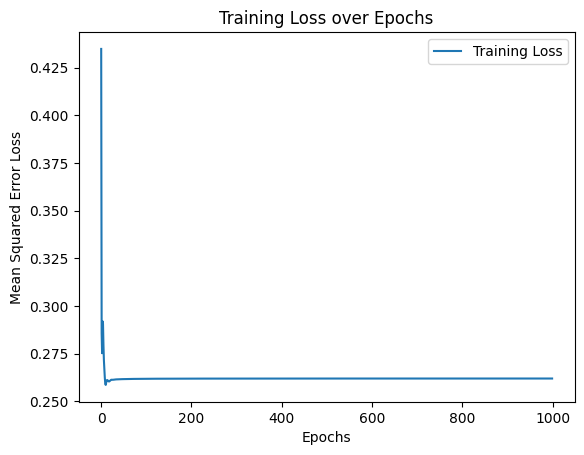


Ground Truth Labels: [0.0, 1.0, 1.0, 0.0]
Model Predictions: [0.5117440223693848, 0.505784273147583, 0.505233108997345, 0.4992733895778656]


In [54]:
train(model3, dataxor_train, device, lr=0.1, epochs=1000)
evaluate(model3, dataxor_val, device)

## Problem 10

Now repeat this, but using both versions of your non-linear two-layer model. Thus: train both versions of your non-linear two layer models, and evaluate them on the data.

Remember the values we got in class. We saw that there is a solution -- i.e., a setting for the parameters of the nonlinear model -- so that the network outputs the XOR outputs.

If you got the right values, try a different random seed.
If you didn't get the right values, try changing the random seed to see if you get something different.

In [55]:
# Define the model we wish to use, and train it.
seed = 42  # You can change this value to any integer to get different random initializations
torch.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

modela = TwoLayerNonLinearRegressor(2, 1)
modela.to(device)

modelb = TwoLayerNonLinearRegressor2(2,1)
modelb.to(device)


TwoLayerNonLinearRegressor2(
  (fc1): LinearRegressor(
    (linear): Linear(in_features=2, out_features=2, bias=True)
  )
  (relu): ReLU()
  (fc2): LinearRegressor(
    (linear): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [56]:
def train(model, data_train, device, lr=0.01, epochs=1000):
    """
    Train the model on XOR data.

    Input:
      model (torch.nn.Module): the model to train
      data_train (torch.utils.data.DataLoader): yields batches of data
      device (torch.device): which device to use to perform computation
      lr (float): learning rate
      epochs (int): number of epochs
    """
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    training_losses = []

    for epoch in tqdm(range(epochs)):
        model.train()
        epoch_loss = 0.0

        for x_batch, y_batch in data_train:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # Forward pass
            output = model(x_batch)
            loss = loss_function(output, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate loss for this epoch
            epoch_loss += loss.item()

        # Average epoch loss and add to list for plotting
        average_epoch_loss = epoch_loss / len(data_train)
        training_losses.append(average_epoch_loss)

        # Print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {average_epoch_loss:.4f}")

    # Plot training loss
    plt.plot(training_losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.show()

In [57]:
def evaluate(model, data_val, device):
    """
    Evaluate the model on XOR data and print predictions.

    Input:
      model (torch.nn.Module): the model to evaluate
      data_val (torch.utils.data.DataLoader): yields batches of validation data
      device (torch.device): which device to use to perform computation
    """
    model.eval()
    predictions = []
    ground_truth = []

    with torch.no_grad():
        for x_val, y_val in data_val:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            pred = model(x_val)
            predictions.append(pred.item())
            ground_truth.append(y_val.item())

    # Print ground truth and predictions
    print("\nGround Truth Labels:", ground_truth)
    print("Model Predictions:", predictions)


  3%|▎         | 131/5000 [00:00<00:22, 221.27it/s]

Epoch 100/5000, Training Loss: 0.1287


  5%|▍         | 242/5000 [00:01<00:22, 211.26it/s]

Epoch 200/5000, Training Loss: 0.1287


  7%|▋         | 336/5000 [00:01<00:20, 230.21it/s]

Epoch 300/5000, Training Loss: 0.1287


  9%|▊         | 429/5000 [00:02<00:21, 216.38it/s]

Epoch 400/5000, Training Loss: 0.1287


 11%|█         | 526/5000 [00:02<00:19, 229.95it/s]

Epoch 500/5000, Training Loss: 0.1296


 13%|█▎        | 627/5000 [00:02<00:17, 245.00it/s]

Epoch 600/5000, Training Loss: 0.1292


 14%|█▍        | 718/5000 [00:03<00:24, 177.17it/s]

Epoch 700/5000, Training Loss: 0.1302


 16%|█▋        | 819/5000 [00:04<00:28, 147.57it/s]

Epoch 800/5000, Training Loss: 0.1301


 19%|█▊        | 927/5000 [00:04<00:19, 204.94it/s]

Epoch 900/5000, Training Loss: 0.1301


 21%|██        | 1038/5000 [00:05<00:15, 259.51it/s]

Epoch 1000/5000, Training Loss: 0.1302


 23%|██▎       | 1141/5000 [00:05<00:16, 231.88it/s]

Epoch 1100/5000, Training Loss: 0.1292


 25%|██▍       | 1230/5000 [00:06<00:20, 185.57it/s]

Epoch 1200/5000, Training Loss: 0.1290


 26%|██▌       | 1304/5000 [00:06<00:25, 143.60it/s]

Epoch 1300/5000, Training Loss: 0.1295


 29%|██▊       | 1429/5000 [00:07<00:23, 151.63it/s]

Epoch 1400/5000, Training Loss: 0.1295


 30%|███       | 1512/5000 [00:08<00:24, 144.95it/s]

Epoch 1500/5000, Training Loss: 0.1295


 32%|███▎      | 1625/5000 [00:08<00:23, 143.90it/s]

Epoch 1600/5000, Training Loss: 0.1295


 34%|███▍      | 1717/5000 [00:09<00:23, 137.48it/s]

Epoch 1700/5000, Training Loss: 0.1295


 36%|███▋      | 1822/5000 [00:10<00:16, 192.48it/s]

Epoch 1800/5000, Training Loss: 0.1295


 38%|███▊      | 1919/5000 [00:10<00:17, 179.59it/s]

Epoch 1900/5000, Training Loss: 0.1295


 40%|████      | 2019/5000 [00:11<00:17, 173.90it/s]

Epoch 2000/5000, Training Loss: 0.1295


 42%|████▏     | 2118/5000 [00:11<00:21, 131.93it/s]

Epoch 2100/5000, Training Loss: 0.1295


 44%|████▍     | 2210/5000 [00:12<00:24, 114.13it/s]

Epoch 2200/5000, Training Loss: 0.1295


 46%|████▋     | 2323/5000 [00:13<00:18, 148.21it/s]

Epoch 2300/5000, Training Loss: 0.1295


 49%|████▊     | 2431/5000 [00:14<00:17, 151.04it/s]

Epoch 2400/5000, Training Loss: 0.1295


 50%|█████     | 2524/5000 [00:14<00:14, 168.37it/s]

Epoch 2500/5000, Training Loss: 0.1295


 53%|█████▎    | 2636/5000 [00:15<00:13, 173.80it/s]

Epoch 2600/5000, Training Loss: 0.1295


 55%|█████▍    | 2731/5000 [00:15<00:10, 213.46it/s]

Epoch 2700/5000, Training Loss: 0.1295


 57%|█████▋    | 2828/5000 [00:16<00:09, 234.23it/s]

Epoch 2800/5000, Training Loss: 0.1295


 59%|█████▊    | 2927/5000 [00:16<00:08, 238.68it/s]

Epoch 2900/5000, Training Loss: 0.1295


 60%|██████    | 3023/5000 [00:17<00:08, 223.14it/s]

Epoch 3000/5000, Training Loss: 0.1295


 63%|██████▎   | 3144/5000 [00:17<00:07, 233.30it/s]

Epoch 3100/5000, Training Loss: 0.1295


 65%|██████▍   | 3245/5000 [00:17<00:07, 241.10it/s]

Epoch 3200/5000, Training Loss: 0.1295


 66%|██████▋   | 3321/5000 [00:18<00:06, 243.40it/s]

Epoch 3300/5000, Training Loss: 0.1295


 68%|██████▊   | 3422/5000 [00:18<00:06, 234.49it/s]

Epoch 3400/5000, Training Loss: 0.1295


 71%|███████   | 3547/5000 [00:19<00:05, 243.11it/s]

Epoch 3500/5000, Training Loss: 0.1295


 72%|███████▏  | 3623/5000 [00:19<00:05, 236.87it/s]

Epoch 3600/5000, Training Loss: 0.1295


 75%|███████▌  | 3751/5000 [00:20<00:05, 239.91it/s]

Epoch 3700/5000, Training Loss: 0.1295


 76%|███████▋  | 3825/5000 [00:20<00:05, 228.27it/s]

Epoch 3800/5000, Training Loss: 0.1295


 79%|███████▉  | 3950/5000 [00:20<00:04, 231.61it/s]

Epoch 3900/5000, Training Loss: 0.1295


 80%|████████  | 4024/5000 [00:21<00:04, 237.08it/s]

Epoch 4000/5000, Training Loss: 0.1295


 83%|████████▎ | 4147/5000 [00:21<00:03, 241.11it/s]

Epoch 4100/5000, Training Loss: 0.1295


 85%|████████▍ | 4246/5000 [00:22<00:03, 228.92it/s]

Epoch 4200/5000, Training Loss: 0.1295


 87%|████████▋ | 4335/5000 [00:22<00:03, 211.07it/s]

Epoch 4300/5000, Training Loss: 0.1295


 89%|████████▉ | 4440/5000 [00:23<00:02, 198.57it/s]

Epoch 4400/5000, Training Loss: 0.1295


 91%|█████████ | 4548/5000 [00:23<00:02, 207.34it/s]

Epoch 4500/5000, Training Loss: 0.1295


 93%|█████████▎| 4646/5000 [00:24<00:01, 232.32it/s]

Epoch 4600/5000, Training Loss: 0.1295


 95%|█████████▍| 4746/5000 [00:24<00:01, 207.71it/s]

Epoch 4700/5000, Training Loss: 0.1295


 96%|█████████▋| 4819/5000 [00:24<00:00, 226.64it/s]

Epoch 4800/5000, Training Loss: 0.1295


 98%|█████████▊| 4920/5000 [00:25<00:00, 231.53it/s]

Epoch 4900/5000, Training Loss: 0.1295


100%|██████████| 5000/5000 [00:25<00:00, 194.29it/s]


Epoch 5000/5000, Training Loss: 0.1295


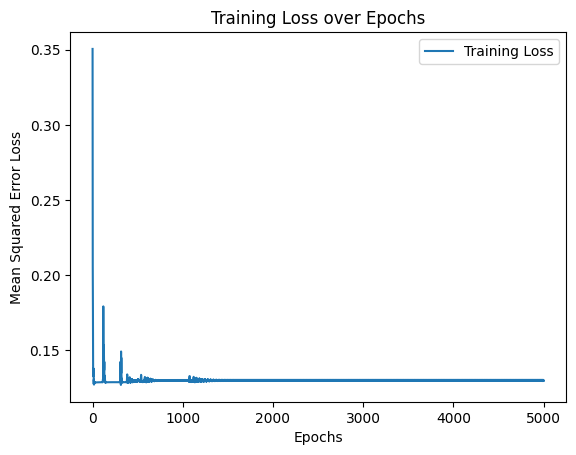


Ground Truth Labels: [0.0, 1.0, 1.0, 0.0]
Model Predictions: [0.5083120465278625, 1.0306963920593262, 0.5083120465278625, 0.033293724060058594]


  2%|▏         | 118/5000 [00:00<00:20, 233.36it/s]

Epoch 100/5000, Training Loss: 0.0089


  5%|▍         | 246/5000 [00:01<00:19, 245.52it/s]

Epoch 200/5000, Training Loss: 0.0000


  6%|▋         | 321/5000 [00:01<00:19, 241.10it/s]

Epoch 300/5000, Training Loss: 0.0005


  8%|▊         | 422/5000 [00:01<00:18, 241.00it/s]

Epoch 400/5000, Training Loss: 0.0011


 10%|█         | 523/5000 [00:02<00:18, 238.39it/s]

Epoch 500/5000, Training Loss: 0.0145


 12%|█▏        | 624/5000 [00:02<00:18, 236.30it/s]

Epoch 600/5000, Training Loss: 0.0001


 15%|█▍        | 747/5000 [00:03<00:17, 239.24it/s]

Epoch 700/5000, Training Loss: 0.0000


 17%|█▋        | 847/5000 [00:03<00:16, 245.16it/s]

Epoch 800/5000, Training Loss: 0.0106


 18%|█▊        | 925/5000 [00:03<00:16, 250.22it/s]

Epoch 900/5000, Training Loss: 0.0000


 21%|██        | 1028/5000 [00:04<00:15, 250.14it/s]

Epoch 1000/5000, Training Loss: 0.0000


 23%|██▎       | 1135/5000 [00:04<00:15, 249.75it/s]

Epoch 1100/5000, Training Loss: 0.0000


 25%|██▍       | 1240/5000 [00:05<00:15, 244.34it/s]

Epoch 1200/5000, Training Loss: 0.0002


 27%|██▋       | 1344/5000 [00:05<00:14, 244.85it/s]

Epoch 1300/5000, Training Loss: 0.0005


 29%|██▉       | 1445/5000 [00:05<00:14, 241.28it/s]

Epoch 1400/5000, Training Loss: 0.0005


 30%|███       | 1518/5000 [00:06<00:15, 230.47it/s]

Epoch 1500/5000, Training Loss: 0.0150


 33%|███▎      | 1641/5000 [00:06<00:14, 228.98it/s]

Epoch 1600/5000, Training Loss: 0.0067


 35%|███▍      | 1732/5000 [00:07<00:15, 208.57it/s]

Epoch 1700/5000, Training Loss: 0.0004


 36%|███▋      | 1825/5000 [00:07<00:14, 213.47it/s]

Epoch 1800/5000, Training Loss: 0.0104


 39%|███▉      | 1945/5000 [00:08<00:13, 230.92it/s]

Epoch 1900/5000, Training Loss: 0.0000


 41%|████      | 2048/5000 [00:08<00:11, 249.36it/s]

Epoch 2000/5000, Training Loss: 0.0001


 42%|████▏     | 2124/5000 [00:08<00:11, 246.06it/s]

Epoch 2100/5000, Training Loss: 0.0000


 45%|████▍     | 2228/5000 [00:09<00:10, 253.72it/s]

Epoch 2200/5000, Training Loss: 0.0000


 47%|████▋     | 2330/5000 [00:09<00:11, 242.46it/s]

Epoch 2300/5000, Training Loss: 0.0005


 49%|████▊     | 2432/5000 [00:10<00:10, 243.26it/s]

Epoch 2400/5000, Training Loss: 0.0009


 51%|█████     | 2534/5000 [00:10<00:10, 244.13it/s]

Epoch 2500/5000, Training Loss: 0.0201


 53%|█████▎    | 2635/5000 [00:11<00:09, 241.50it/s]

Epoch 2600/5000, Training Loss: 0.0136


 55%|█████▍    | 2730/5000 [00:11<00:11, 204.09it/s]

Epoch 2700/5000, Training Loss: 0.0002


 57%|█████▋    | 2826/5000 [00:12<00:09, 225.61it/s]

Epoch 2800/5000, Training Loss: 0.0000


 58%|█████▊    | 2924/5000 [00:12<00:08, 231.74it/s]

Epoch 2900/5000, Training Loss: 0.0000


 60%|██████    | 3023/5000 [00:12<00:08, 223.15it/s]

Epoch 3000/5000, Training Loss: 0.0001


 63%|██████▎   | 3144/5000 [00:13<00:08, 229.30it/s]

Epoch 3100/5000, Training Loss: 0.0001


 64%|██████▍   | 3220/5000 [00:13<00:07, 241.36it/s]

Epoch 3200/5000, Training Loss: 0.0003


 67%|██████▋   | 3345/5000 [00:14<00:06, 243.59it/s]

Epoch 3300/5000, Training Loss: 0.0032


 69%|██████▊   | 3437/5000 [00:14<00:07, 201.62it/s]

Epoch 3400/5000, Training Loss: 0.0007


 71%|███████   | 3536/5000 [00:15<00:06, 231.89it/s]

Epoch 3500/5000, Training Loss: 0.0160


 73%|███████▎  | 3636/5000 [00:15<00:05, 238.16it/s]

Epoch 3600/5000, Training Loss: 0.0126


 75%|███████▍  | 3738/5000 [00:16<00:05, 242.90it/s]

Epoch 3700/5000, Training Loss: 0.0002


 77%|███████▋  | 3840/5000 [00:16<00:04, 242.16it/s]

Epoch 3800/5000, Training Loss: 0.0000


 79%|███████▉  | 3941/5000 [00:16<00:04, 244.66it/s]

Epoch 3900/5000, Training Loss: 0.0000


 81%|████████  | 4044/5000 [00:17<00:03, 248.18it/s]

Epoch 4000/5000, Training Loss: 0.0001


 83%|████████▎ | 4144/5000 [00:17<00:03, 239.51it/s]

Epoch 4100/5000, Training Loss: 0.0000


 84%|████████▍ | 4218/5000 [00:18<00:03, 233.37it/s]

Epoch 4200/5000, Training Loss: 0.0001


 87%|████████▋ | 4345/5000 [00:18<00:02, 241.73it/s]

Epoch 4300/5000, Training Loss: 0.0002


 88%|████████▊ | 4418/5000 [00:18<00:02, 221.79it/s]

Epoch 4400/5000, Training Loss: 0.0006


 91%|█████████ | 4530/5000 [00:19<00:02, 213.29it/s]

Epoch 4500/5000, Training Loss: 0.0134


 93%|█████████▎| 4647/5000 [00:19<00:01, 230.59it/s]

Epoch 4600/5000, Training Loss: 0.0123


 95%|█████████▍| 4746/5000 [00:20<00:01, 234.43it/s]

Epoch 4700/5000, Training Loss: 0.0002


 96%|█████████▋| 4818/5000 [00:20<00:00, 218.31it/s]

Epoch 4800/5000, Training Loss: 0.0002


 99%|█████████▊| 4934/5000 [00:21<00:00, 220.45it/s]

Epoch 4900/5000, Training Loss: 0.0001


100%|██████████| 5000/5000 [00:21<00:00, 231.89it/s]


Epoch 5000/5000, Training Loss: 0.0000


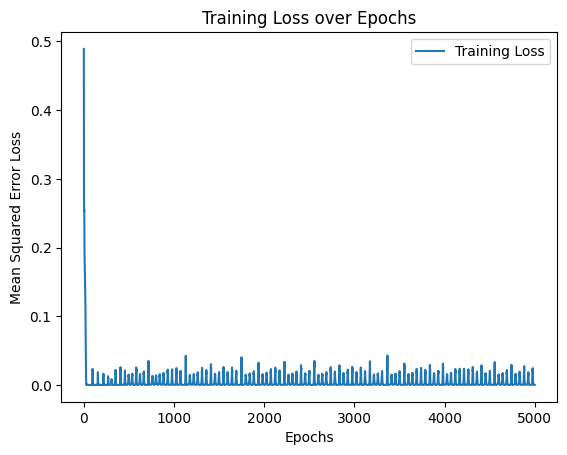


Ground Truth Labels: [0.0, 1.0, 1.0, 0.0]
Model Predictions: [-0.0014387479750439525, 0.9941768646240234, 0.9975627064704895, -0.0014387479750439525]


In [58]:
train(modela, dataxor_train, device, lr=0.1, epochs=5000)
evaluate(modela, dataxor_val, device)

train(modelb, dataxor_train, device, lr=0.1, epochs=5000)
evaluate(modelb, dataxor_val, device)

## Problem 11

If you did the above correctly, you will see that the values depend quite a bit on the random seed. In fact, you probably noticed that most random seeds **don't seem to work**.

What is happening here is that we are getting stuck in a local minimum, and our gradient-based method used in the training loop cannot escape from it.

Modify the definition of your non-linear two layer network so that the first layer of neurons (the hidden layer) has more than 2 (say, 10 or 15) neurons. Note that this means your network has more parameters.

Then run it again with different seeds on the XOR training data. Is it easier (i.e., easier to find a random seed that works)?

In [59]:
class TwoLayerNonLinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Define a model that has a linear layer, a ReLU layer and another linear layer.
        """
        super().__init__()
        self.linear = torch.nn.Sequential(
            LinearRegressor(input_dim, hidden_dim),
            torch.nn.ReLU(),
            LinearRegressor(hidden_dim, output_dim)
        )
    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)

class TwoLayerNonLinearRegressor2(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Define a model that has a linear layer, a ReLU layer and another linear layer.
        """
        super().__init__()
        self.fc1 = LinearRegressor(input_dim, hidden_dim)  # First linear layer
        self.relu = torch.nn.ReLU()                       # ReLU activation
        self.fc2 = LinearRegressor(hidden_dim, output_dim) # Second linear layer

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.flatten(x)

In [60]:
# Define the model we wish to use, and train it.
seed = 42  # You can change this value to any integer to get different random initializations
torch.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_a = TwoLayerNonLinearRegressor(2, 15, 1)
model_a.to(device)

model_b = TwoLayerNonLinearRegressor2(2, 15, 1)
model_b.to(device)

TwoLayerNonLinearRegressor2(
  (fc1): LinearRegressor(
    (linear): Linear(in_features=2, out_features=15, bias=True)
  )
  (relu): ReLU()
  (fc2): LinearRegressor(
    (linear): Linear(in_features=15, out_features=1, bias=True)
  )
)

  3%|▎         | 139/5000 [00:00<00:23, 204.14it/s]

Epoch 100/5000, Training Loss: 0.0000


  5%|▍         | 242/5000 [00:01<00:19, 243.50it/s]

Epoch 200/5000, Training Loss: 0.0000


  7%|▋         | 346/5000 [00:01<00:18, 249.96it/s]

Epoch 300/5000, Training Loss: 0.0000


  8%|▊         | 421/5000 [00:02<00:21, 210.60it/s]

Epoch 400/5000, Training Loss: 0.0000


 11%|█         | 527/5000 [00:02<00:22, 198.64it/s]

Epoch 500/5000, Training Loss: 0.0564


 13%|█▎        | 627/5000 [00:03<00:23, 187.99it/s]

Epoch 600/5000, Training Loss: 0.0117


 15%|█▍        | 729/5000 [00:03<00:22, 194.06it/s]

Epoch 700/5000, Training Loss: 0.0024


 17%|█▋        | 829/5000 [00:04<00:22, 184.38it/s]

Epoch 800/5000, Training Loss: 0.0031


 19%|█▊        | 930/5000 [00:04<00:21, 192.99it/s]

Epoch 900/5000, Training Loss: 0.0036


 21%|██        | 1030/5000 [00:05<00:20, 190.29it/s]

Epoch 1000/5000, Training Loss: 0.0035


 23%|██▎       | 1136/5000 [00:05<00:19, 199.09it/s]

Epoch 1100/5000, Training Loss: 0.0035


 24%|██▍       | 1217/5000 [00:06<00:24, 151.38it/s]

Epoch 1200/5000, Training Loss: 0.0035


 26%|██▋       | 1322/5000 [00:06<00:18, 198.94it/s]

Epoch 1300/5000, Training Loss: 0.0035


 28%|██▊       | 1424/5000 [00:07<00:26, 132.70it/s]

Epoch 1400/5000, Training Loss: 0.0031


 31%|███       | 1549/5000 [00:08<00:17, 199.71it/s]

Epoch 1500/5000, Training Loss: 0.0040


 33%|███▎      | 1642/5000 [00:08<00:15, 218.58it/s]

Epoch 1600/5000, Training Loss: 0.0042


 35%|███▍      | 1728/5000 [00:09<00:16, 196.46it/s]

Epoch 1700/5000, Training Loss: 0.0029


 37%|███▋      | 1829/5000 [00:10<00:17, 182.16it/s]

Epoch 1800/5000, Training Loss: 0.0024


 38%|███▊      | 1922/5000 [00:10<00:17, 173.59it/s]

Epoch 1900/5000, Training Loss: 0.0040


 41%|████      | 2033/5000 [00:11<00:17, 171.90it/s]

Epoch 2000/5000, Training Loss: 0.0050


 42%|████▏     | 2122/5000 [00:11<00:18, 157.44it/s]

Epoch 2100/5000, Training Loss: 0.0027


 44%|████▍     | 2220/5000 [00:12<00:18, 153.80it/s]

Epoch 2200/5000, Training Loss: 0.0022


 46%|████▋     | 2323/5000 [00:13<00:16, 163.35it/s]

Epoch 2300/5000, Training Loss: 0.0051


 49%|████▊     | 2427/5000 [00:13<00:15, 163.88it/s]

Epoch 2400/5000, Training Loss: 0.0036


 51%|█████     | 2528/5000 [00:14<00:15, 161.83it/s]

Epoch 2500/5000, Training Loss: 0.0016


 53%|█████▎    | 2639/5000 [00:15<00:12, 183.19it/s]

Epoch 2600/5000, Training Loss: 0.0060


 55%|█████▍    | 2732/5000 [00:15<00:13, 162.05it/s]

Epoch 2700/5000, Training Loss: 0.0026


 56%|█████▋    | 2824/5000 [00:16<00:12, 174.54it/s]

Epoch 2800/5000, Training Loss: 0.0020


 58%|█████▊    | 2920/5000 [00:16<00:11, 180.15it/s]

Epoch 2900/5000, Training Loss: 0.0064


 61%|██████    | 3026/5000 [00:17<00:12, 158.08it/s]

Epoch 3000/5000, Training Loss: 0.0020


 63%|██████▎   | 3129/5000 [00:18<00:11, 164.78it/s]

Epoch 3100/5000, Training Loss: 0.0027


 64%|██████▍   | 3217/5000 [00:18<00:10, 167.84it/s]

Epoch 3200/5000, Training Loss: 0.0057


 67%|██████▋   | 3341/5000 [00:19<00:08, 203.81it/s]

Epoch 3300/5000, Training Loss: 0.0018


 69%|██████▊   | 3426/5000 [00:19<00:08, 179.48it/s]

Epoch 3400/5000, Training Loss: 0.0036


 71%|███████   | 3532/5000 [00:20<00:07, 202.50it/s]

Epoch 3500/5000, Training Loss: 0.0047


 72%|███████▏  | 3617/5000 [00:20<00:07, 194.36it/s]

Epoch 3600/5000, Training Loss: 0.0017


 74%|███████▍  | 3717/5000 [00:21<00:06, 188.57it/s]

Epoch 3700/5000, Training Loss: 0.0045


 77%|███████▋  | 3838/5000 [00:22<00:06, 191.37it/s]

Epoch 3800/5000, Training Loss: 0.0039


 78%|███████▊  | 3920/5000 [00:22<00:05, 193.01it/s]

Epoch 3900/5000, Training Loss: 0.0018


 81%|████████  | 4040/5000 [00:23<00:05, 185.60it/s]

Epoch 4000/5000, Training Loss: 0.0052


 83%|████████▎ | 4138/5000 [00:23<00:04, 190.19it/s]

Epoch 4100/5000, Training Loss: 0.0033


 85%|████████▍ | 4242/5000 [00:24<00:04, 184.55it/s]

Epoch 4200/5000, Training Loss: 0.0020


 87%|████████▋ | 4346/5000 [00:24<00:03, 201.59it/s]

Epoch 4300/5000, Training Loss: 0.0055


 89%|████████▊ | 4432/5000 [00:25<00:02, 204.71it/s]

Epoch 4400/5000, Training Loss: 0.0030


 91%|█████████ | 4538/5000 [00:25<00:02, 203.18it/s]

Epoch 4500/5000, Training Loss: 0.0022


 93%|█████████▎| 4627/5000 [00:26<00:01, 211.88it/s]

Epoch 4600/5000, Training Loss: 0.0055


 95%|█████████▍| 4737/5000 [00:26<00:01, 207.68it/s]

Epoch 4700/5000, Training Loss: 0.0028


 97%|█████████▋| 4847/5000 [00:27<00:00, 208.97it/s]

Epoch 4800/5000, Training Loss: 0.0023


 99%|█████████▊| 4934/5000 [00:27<00:00, 184.63it/s]

Epoch 4900/5000, Training Loss: 0.0054


100%|██████████| 5000/5000 [00:28<00:00, 176.49it/s]


Epoch 5000/5000, Training Loss: 0.0028


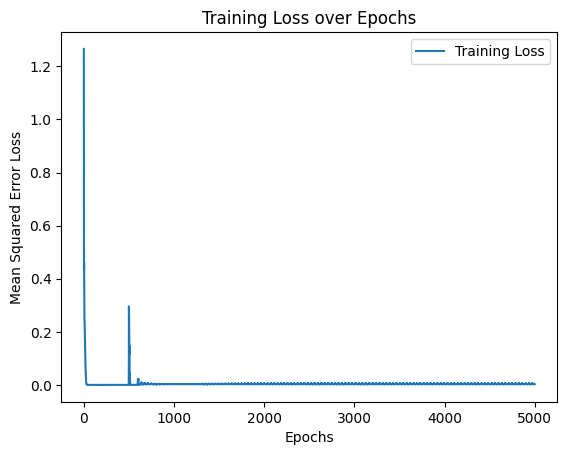


Ground Truth Labels: [0.0, 1.0, 1.0, 0.0]
Model Predictions: [0.013438509777188301, 1.0414354801177979, 1.0157427787780762, 0.013438509777188301]


  2%|▏         | 121/5000 [00:00<00:24, 198.67it/s]

Epoch 100/5000, Training Loss: 0.0000


  5%|▍         | 236/5000 [00:01<00:21, 220.47it/s]

Epoch 200/5000, Training Loss: 0.0000


  7%|▋         | 339/5000 [00:01<00:24, 188.86it/s]

Epoch 300/5000, Training Loss: 0.0002


  9%|▊         | 426/5000 [00:02<00:21, 211.01it/s]

Epoch 400/5000, Training Loss: 0.0017


 11%|█         | 528/5000 [00:02<00:24, 183.20it/s]

Epoch 500/5000, Training Loss: 0.0000


 13%|█▎        | 637/5000 [00:03<00:22, 192.13it/s]

Epoch 600/5000, Training Loss: 0.0161


 14%|█▍        | 721/5000 [00:03<00:21, 200.74it/s]

Epoch 700/5000, Training Loss: 0.0000


 17%|█▋        | 830/5000 [00:04<00:20, 206.30it/s]

Epoch 800/5000, Training Loss: 0.0001


 19%|█▊        | 933/5000 [00:04<00:20, 195.21it/s]

Epoch 900/5000, Training Loss: 0.0007


 20%|██        | 1018/5000 [00:05<00:19, 205.73it/s]

Epoch 1000/5000, Training Loss: 0.0010


 22%|██▏       | 1124/5000 [00:05<00:19, 201.38it/s]

Epoch 1100/5000, Training Loss: 0.0117


 25%|██▍       | 1234/5000 [00:06<00:18, 201.65it/s]

Epoch 1200/5000, Training Loss: 0.0005


 27%|██▋       | 1342/5000 [00:06<00:18, 193.74it/s]

Epoch 1300/5000, Training Loss: 0.0002


 29%|██▊       | 1428/5000 [00:07<00:18, 196.49it/s]

Epoch 1400/5000, Training Loss: 0.0001


 31%|███       | 1533/5000 [00:08<00:17, 196.95it/s]

Epoch 1500/5000, Training Loss: 0.0000


 32%|███▏      | 1621/5000 [00:08<00:16, 203.88it/s]

Epoch 1600/5000, Training Loss: 0.0000


 35%|███▍      | 1729/5000 [00:09<00:16, 200.94it/s]

Epoch 1700/5000, Training Loss: 0.0005


 37%|███▋      | 1836/5000 [00:09<00:15, 202.15it/s]

Epoch 1800/5000, Training Loss: 0.0008


 39%|███▉      | 1940/5000 [00:10<00:16, 180.93it/s]

Epoch 1900/5000, Training Loss: 0.0176


 40%|████      | 2019/5000 [00:10<00:15, 187.91it/s]

Epoch 2000/5000, Training Loss: 0.0115


 43%|████▎     | 2126/5000 [00:11<00:14, 195.61it/s]

Epoch 2100/5000, Training Loss: 0.0002


 45%|████▍     | 2226/5000 [00:11<00:14, 190.64it/s]

Epoch 2200/5000, Training Loss: 0.0001


 47%|████▋     | 2335/5000 [00:12<00:12, 205.48it/s]

Epoch 2300/5000, Training Loss: 0.0003


 49%|████▉     | 2441/5000 [00:12<00:12, 205.27it/s]

Epoch 2400/5000, Training Loss: 0.0001


 51%|█████     | 2548/5000 [00:13<00:11, 205.20it/s]

Epoch 2500/5000, Training Loss: 0.0003


 53%|█████▎    | 2628/5000 [00:13<00:15, 153.87it/s]

Epoch 2600/5000, Training Loss: 0.0008


 55%|█████▍    | 2727/5000 [00:14<00:11, 190.93it/s]

Epoch 2700/5000, Training Loss: 0.0000


 57%|█████▋    | 2835/5000 [00:15<00:11, 194.23it/s]

Epoch 2800/5000, Training Loss: 0.0000


 59%|█████▉    | 2945/5000 [00:15<00:09, 210.14it/s]

Epoch 2900/5000, Training Loss: 0.0001


 61%|██████    | 3032/5000 [00:15<00:09, 200.36it/s]

Epoch 3000/5000, Training Loss: 0.0003


 63%|██████▎   | 3138/5000 [00:16<00:09, 202.01it/s]

Epoch 3100/5000, Training Loss: 0.0009


 64%|██████▍   | 3221/5000 [00:17<00:10, 170.70it/s]

Epoch 3200/5000, Training Loss: 0.0084


 67%|██████▋   | 3334/5000 [00:17<00:08, 200.15it/s]

Epoch 3300/5000, Training Loss: 0.0161


 69%|██████▊   | 3436/5000 [00:18<00:08, 184.06it/s]

Epoch 3400/5000, Training Loss: 0.0041


 71%|███████   | 3537/5000 [00:18<00:07, 185.41it/s]

Epoch 3500/5000, Training Loss: 0.0003


 73%|███████▎  | 3636/5000 [00:19<00:07, 193.01it/s]

Epoch 3600/5000, Training Loss: 0.0003


 74%|███████▍  | 3717/5000 [00:19<00:06, 188.75it/s]

Epoch 3700/5000, Training Loss: 0.0000


 76%|███████▋  | 3821/5000 [00:20<00:06, 195.80it/s]

Epoch 3800/5000, Training Loss: 0.0000


 78%|███████▊  | 3908/5000 [00:20<00:05, 204.37it/s]

Epoch 3900/5000, Training Loss: 0.0003


 81%|████████  | 4038/5000 [00:21<00:04, 198.42it/s]

Epoch 4000/5000, Training Loss: 0.0002


 82%|████████▏ | 4122/5000 [00:21<00:04, 186.68it/s]

Epoch 4100/5000, Training Loss: 0.0006


 85%|████████▍ | 4227/5000 [00:22<00:04, 188.60it/s]

Epoch 4200/5000, Training Loss: 0.0008


 87%|████████▋ | 4332/5000 [00:23<00:03, 190.80it/s]

Epoch 4300/5000, Training Loss: 0.0186


 89%|████████▊ | 4433/5000 [00:23<00:03, 186.38it/s]

Epoch 4400/5000, Training Loss: 0.0058


 90%|█████████ | 4525/5000 [00:24<00:03, 152.68it/s]

Epoch 4500/5000, Training Loss: 0.0066


 92%|█████████▏| 4622/5000 [00:24<00:02, 185.55it/s]

Epoch 4600/5000, Training Loss: 0.0000


 95%|█████████▍| 4731/5000 [00:25<00:01, 200.54it/s]

Epoch 4700/5000, Training Loss: 0.0000


 97%|█████████▋| 4837/5000 [00:25<00:00, 195.39it/s]

Epoch 4800/5000, Training Loss: 0.0000


 98%|█████████▊| 4924/5000 [00:26<00:00, 201.70it/s]

Epoch 4900/5000, Training Loss: 0.0002


100%|██████████| 5000/5000 [00:26<00:00, 186.00it/s]


Epoch 5000/5000, Training Loss: 0.0002


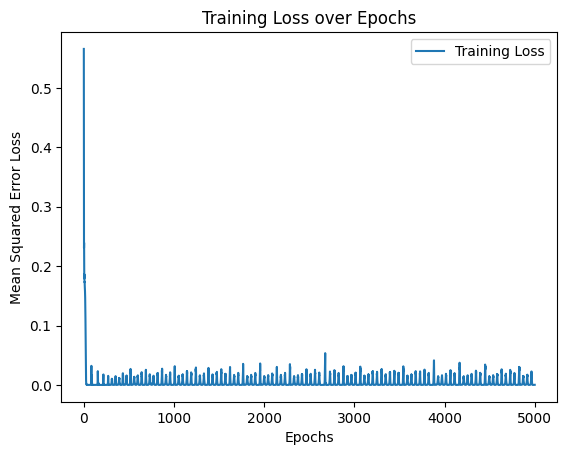


Ground Truth Labels: [0.0, 1.0, 1.0, 0.0]
Model Predictions: [-0.004141681827604771, 0.9841781854629517, 0.9927523732185364, -0.004141681827604771]


In [61]:
train(model_a, dataxor_train, device, lr=0.1, epochs=5000)
evaluate(model_a, dataxor_val, device)

train(model_b, dataxor_train, device, lr=0.1, epochs=5000)
evaluate(model_b, dataxor_val, device)

It was much easier to find a seed that produces the right values with 15 neurons in the hidden layer.

## Problem 12

Print the parameters of one of your non-linear models. Thus, you should print: 4 weights plus 2 bias values for the first layer, and then 2 weights plus 1 bias value for the second: 9 parameters in total.

In [62]:
print("Model Parameters:")
for name, param in modela.named_parameters():
    print(f"{name}: {param.data}")

Model Parameters:
linear.0.linear.weight: tensor([[ 1.2605,  1.3561],
        [-1.1579,  1.5982]])
linear.0.linear.bias: tensor([-1.4230, -0.5761])
linear.2.linear.weight: tensor([[-0.3979,  0.5111]])
linear.2.linear.bias: tensor([0.5083])
